# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

# Цели исследования
- Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.
- Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько времени обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго.
- Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружены.
- Обозначить какие факторы больше всего влияют на стоимость квартиры. Изучить, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
- Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.
- Изучить предложения квартир. Выяснить, какая область входит в центр. Постройте график: как цена зависит от удалённости от центра.
- Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры. Сделать выводы.

**Информация о входных данных**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Загрузка данных

In [1]:
#Импортирую необходимые для работы библиотеки

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Cоздаю DataFrame с названием data, которому присваиваю значение загруженного датасета с помощью метода .read_csv() и аргументом sep='\t'
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#Получаю базовую информацию о датафрейме
display(data.head(10), data.tail(10))
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Количество пропусков в датасете
print(data.isna().sum())

#Рассчитаем долю пропусков в процентах
pd.DataFrame(data.isna().mean()*100,).style.background_gradient('coolwarm')

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.799105
floors_total,0.362885
living_area,8.029875
floor,0.000000
is_apartment,88.290645


Что видим? В 14 из 22 столбцов есть пропущенные значения, а именно:
- Столбец 'ceiling_height'  (39% пропусков)
- Столбец 'floors_total'  (0.36% пропусков)
- Столбец 'living_area'  (8% пропусков)
- Столбец 'is_apartment'  (88% пропусков)
- Столбец 'kitchen_area'  (9.6% пропусков)
- Столбец 'balcony'  (48.6% пропусков)
- Столбец 'locality_name'  (0.21% пропусков)
- Столбец 'airports_nearest'  (23.4% пропусков)
- Столбец 'cityCenters_nearest'  (23.3% пропусков)
- Столбец 'parks_around3000'  (23.3% пропусков)
- Столбец 'parks_nearest'  (65.9% пропусков)
- Столбец 'ponds_around3000'  (23.3% пропусков)
- Столбец 'ponds_nearest'  (61.6% пропусков)
- Столбец 'days_exposition'  (13.4% пропусков)

In [5]:
# Количество явных дубликатов
data.duplicated().sum()

0

In [6]:
#Вызываю метод .columns для изучения корректности заголовков датафрейма
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

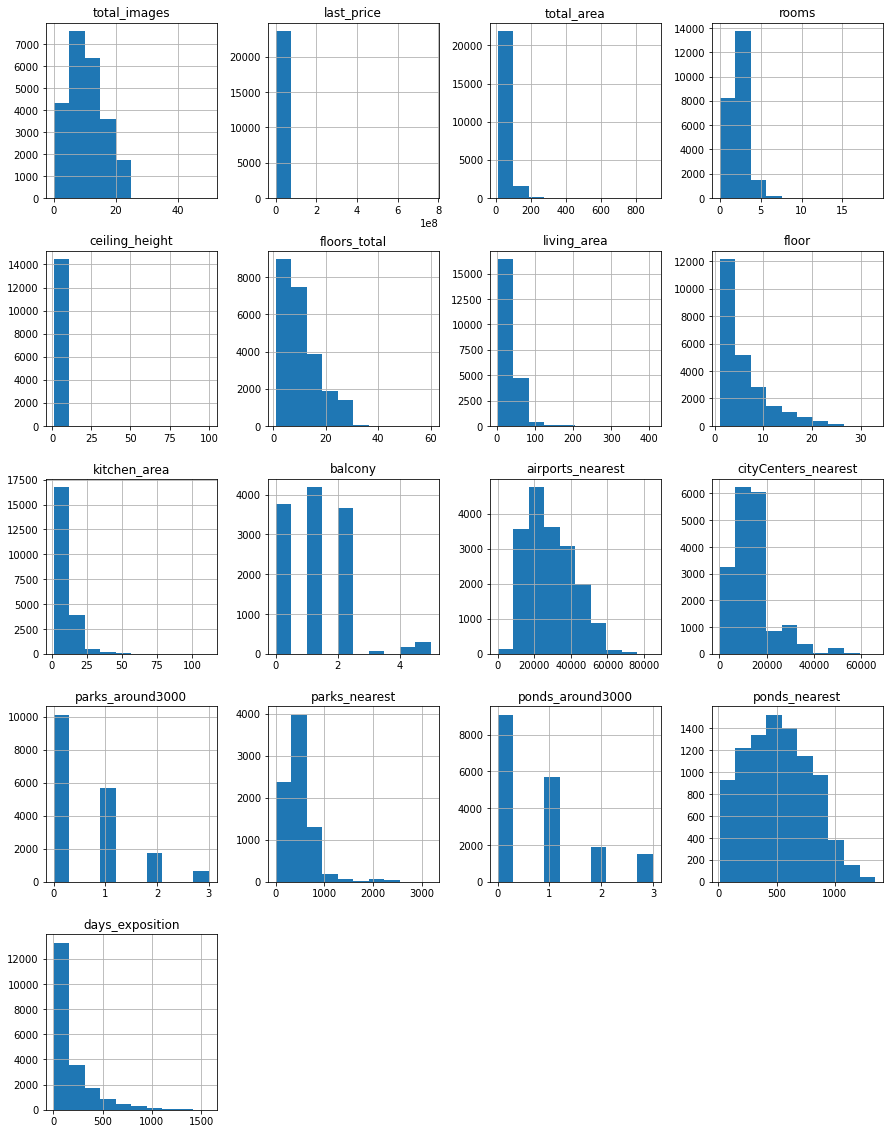

In [7]:
#Строю гистограммы для всех числовых столбцов датафрейма
data.hist(figsize=(15, 20))
plt.show();

**Первичные итоги ознакомления с данными:**

1. Датафрейм содержит информацию по 23699 объектам недвижимости, каждый из которых описывается 22 признаками (17 количественных, 4 категориальных и 1 временной).
2. Все наименования столбцов имеют корректный вид и пригодны для дальнейшей работы. Однако есть смысл переименовать столбец 'cityCenters_nearest' в соответствии со стилем snake_case.
3. Обнаружены ошибки в типах данных по следующим столбцам: 
* 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000' и 'days_exposition' - тип данных должен быть целочисленным (int64);
* 'is_apartment' - булевой тип (bool);
* 'first_day_exposition' - тип даты и времени (datetime64).
3. У некоторых признаков есть пропущенные значения. Пропуски, скорее всего, связаны с "человеческим" фактором: пользователь мог не указать конкретный параметр, предполагая его отсутствие (например, количество балконов или принадлежность к апартаментам). Однако допускаем и технические ошибки, а также особенности работы сервиса Яндекс.Недвижимость - необязательность заполнения тех или иных полей в анкете, ошибки в картографических расчетах (расчет радиуса до объектов - аэропорт, водоемы, парки), сбой в работе базы данных при выгрузке, при внесении данных в базу, некорректная или неполная миграция данных в процессе переноса данных - их считывания, копирования, смене формата или записи.
4. По гистрограммам видно, что некоторые колонки заставляют усомниться в качестве данных. Например, колонка 'ceiling_height' с максимальной высотой потолка в 100 метров и колонка 'room' с количеством комнат, равное нулю.
5. Явных дубликатов не выявлено.
6. Для ответа на поставленные вопросы в дальнейшем анализе потребуется работать со следующими столбцами:
- total_area — площадь квартиры в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- first_day_exposition — дата публикации
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах(м²)
- kitchen_area — площадь кухни в квадратных метрах (м²)

Исходя из вышеизложенного, следует начать предобработку данных именно с анализа данного перечня столбцов.

### Предобработка данных

In [8]:
# Скорректируем тип данных в столбце first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d %H:%M:%S')

Теперь, как и планировали, проведем предобработку данных последовательно по каждой колонке.

1. **locality_name** - название населённого пункта

In [9]:
# Исследуем столбец 'locality_name' на предмет уникальных значений
print('Количество уникальных значений:', data['locality_name'].nunique())
data['locality_name'].unique()

Количество уникальных значений: 364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [10]:
# Займемся неявными дубликатами
# Приведём значения к нижнему регистру для избавления от дубликатов
data['locality_name'] = data['locality_name'].str.lower()

# Выполним замену ошибки в написании 'поселок' вместо 'посёлок':
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

# Замена однотипных значений
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'посёлок')

# Уникальные значения в алфавитном порядке
set(data['locality_name'].unique())

{nan,
 'бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'городской посёлок большая ижора',
 'городской посёлок будогощь',
 'городской посёлок виллози',
 'городской посёлок лесогорский',
 'городской посёлок мга',
 'городской посёлок назия',
 'городской посёлок новоселье',
 'городской посёлок павлово',
 'городской посёлок рощино',
 'городской посёлок свирьстрой',
 'городской посёлок советский',
 'городской посёлок фёдоровское',
 'городской посёлок янино-1',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'д

In [11]:
# В данном столбце 49 пропущенных значений. Мы не обладаем необходимой информацией для его заполнения, поэтому остается удалить эти строки.

# Удаление пропусков
data = data.dropna(subset=['locality_name'])
print("Количество пропущенных значений:", data['locality_name'].isna().sum())

# Считаем количество уникальных значений после удаления дубликатов
print('Количество населенных пунктов:', data['locality_name'].nunique())

Количество пропущенных значений: 0
Количество населенных пунктов: 330


2. **ceiling_height** - высота потолков (м)

In [12]:
# В столбце 'ceiling_height' насчитали 9195 пропусков. Данную ячейки заполним медианным значением:

print('Медианная высота потолков:',data['ceiling_height'].median())
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

Медианная высота потолков: 2.65


In [13]:
#Взглянем еще раз на максимальные значения по высоте потолков
data['ceiling_height'].sort_values(ascending=False).head(60)

22869    100.00
3148      32.00
22336     32.00
21377     27.50
17857     27.00
5246      27.00
20478     27.00
21824     27.00
10773     27.00
4876      27.00
5807      27.00
22938     27.00
5669      26.00
11285     25.00
6246      25.00
9379      25.00
355       25.00
18545     25.00
4643      25.00
14382     25.00
5076      24.00
20507     22.60
17496     20.00
15061     14.00
22309     10.30
5863       8.30
17442      8.00
3474       8.00
15743      8.00
20264      6.00
21227      5.80
1388       5.60
7578       5.50
1026       5.30
12628      5.30
464        5.20
1053       5.00
21923      4.90
2802       4.80
1300       4.70
19142      4.70
12401      4.65
6802       4.50
2823       4.50
9783       4.50
14519      4.50
10159      4.50
3067       4.50
13224      4.50
7521       4.45
8018       4.45
11651      4.40
7274       4.40
6728       4.40
4201       4.37
10754      4.30
17078      4.25
22055      4.20
6617       4.20
19041      4.20
Name: ceiling_height, dtype: float64

Потолки выше 20 метров вызывают вопросы. Скорректируем этот ряд значений, поделив их на 10.

In [14]:
# Скорректируем высоту подозрительных потолков

data.loc[(data['ceiling_height'] >= 20), 'ceiling_height'] = data['ceiling_height']/10

In [15]:
# Сверимся по новым значениям потолков
data['ceiling_height'].sort_values(ascending=False).head(60)

15061    14.00
22309    10.30
22869    10.00
5863      8.30
3474      8.00
17442     8.00
15743     8.00
20264     6.00
21227     5.80
1388      5.60
7578      5.50
1026      5.30
12628     5.30
464       5.20
1053      5.00
21923     4.90
2802      4.80
1300      4.70
19142     4.70
12401     4.65
13224     4.50
10159     4.50
14519     4.50
2823      4.50
9783      4.50
6802      4.50
3067      4.50
7521      4.45
8018      4.45
11651     4.40
7274      4.40
6728      4.40
4201      4.37
10754     4.30
17078     4.25
2843      4.20
14619     4.20
19041     4.20
22494     4.20
11128     4.20
20873     4.20
22055     4.20
6617      4.20
7279      4.20
6901      4.20
2999      4.19
2639      4.19
154       4.15
15567     4.14
11239     4.10
6127      4.10
4892      4.10
1129      4.06
1085      4.00
6226      4.00
179       4.00
21857     4.00
14900     4.00
8489      4.00
7618      4.00
Name: ceiling_height, dtype: float64

3. **floors_total** - всего этажей в доме

In [16]:
# Построим сводную таблицу с медианным значением по столбцу 'floors_total'
floor_median = data.pivot_table(index='floor', values='floors_total', aggfunc='median').reset_index()
print(floor_median)

# Пропишем цикл по замене пропусков медианным значением

for index in range(data['floor'].min(), (data['floor'].max()+1)):
    data.loc[data['floor'] == index, 'floors_total'] = \
    (data.loc[data['floor'] == index, 'floors_total'] \
    .fillna(floor_median[floor_median['floor'] == index]['floors_total'].sum()))
    
print('Пропущенных значений по этажам:', data['floor'].isna().sum())

# Поменяем тип данных на 'int'
data['floors_total'] = data['floors_total'].astype('int')

    floor  floors_total
0       1           5.0
1       2           5.0
2       3           5.0
3       4           5.0
4       5           6.0
5       6           9.0
6       7          10.0
7       8          10.0
8       9          10.0
9      10          16.0
10     11          16.0
11     12          16.0
12     13          17.0
13     14          17.0
14     15          17.0
15     16          18.0
16     17          22.0
17     18          22.0
18     19          24.0
19     20          24.0
20     21          25.0
21     22          25.0
22     23          25.0
23     24          25.0
24     25          25.0
25     26          27.0
26     27          27.0
27     28          36.0
28     29          36.0
29     30          35.0
30     31          35.0
31     32          33.0
32     33          35.0
Пропущенных значений по этажам: 0


4. **living_area** - жилая площадь в кв. метрах (м²)

In [17]:
# Рассчитаем коэффициент корреляции Пирсона - через корреляцию найдем те столбцы, при помощи которых мы можем произвести заполнение пустых ячеек.
сorr = data.corr()
print(сorr.sort_values(by='living_area', ascending=False)['living_area'].reset_index().head())

print()

# Построим сводную таблицу по распределению усредненной жилой площади на одну комнату в зависимости от количества комнат в квартире:
living_area_mean = round(data.pivot_table(index='rooms', values='living_area', aggfunc='mean')).reset_index()
print(living_area_mean)

print()

#Посчитаем среднюю жилую площадь на одну комнату в целом по столбцу:
print(round(living_area_mean['living_area'].sum() / living_area_mean['rooms'].sum()))

          index  living_area
0   living_area     1.000000
1    total_area     0.939534
2         rooms     0.846088
3    last_price     0.566517
4  kitchen_area     0.428773

    rooms  living_area
0       0         19.0
1       1         18.0
2       2         32.0
3       3         47.0
4       4         67.0
5       5        100.0
6       6        131.0
7       7        164.0
8       8        169.0
9       9        190.0
10     10        166.0
11     11        134.0
12     12        410.0
13     14        195.0
14     15        409.0
15     16        180.0
16     19        264.0

19


Из корреляции прослеживается сильная взаимосвязь между парами: жилая площадь - общая площадь, жилая площадь - количество комнат в квартире. 
Для заполнения пропусков в столбце жилой площади есть смысл рассчитать произведение усредненной площади одной комнаты на количество комнат в квартире.

In [18]:
# Создаем функцию для заполнения пропусков на основе данных об усредненной жилой площади и количества комнат
mean = 19
def replace_living(row):
    count = row['rooms']
    return count * mean
data['living_area'] = round(data['living_area'].fillna(data.apply(replace_living, axis=1)))
#print(data['living_area'].head(50))

print('Пропущенных значений по жилой площади:', data['living_area'].isna().sum())

Пропущенных значений по жилой площади: 0


5. **is_apartment** - апартаменты (булев тип)

In [19]:
# Сравним количество апартаментов и не апартаментов
data['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

Исходя из полученного соотношения, можно утверждать, что пропущенные значения в столбце 'is_apartment' связаны с тем, что квартира не относится к категории апартаментов, и владелец не посчитал необходимым указывать соответствующую информацию в анкете. Таким образом есть смысл заполнить пустые ячейки значением 'False'.

In [20]:
#Заменим пропуски в данных на False
data['is_apartment'] = data['is_apartment'].fillna(False)

print('Пропущенных значений по апартаментам:', data['is_apartment'].isna().sum())

Пропущенных значений по апартаментам: 0


In [21]:
# Скорректируем тип данных на булевой
data['is_apartment'] = data['is_apartment'].astype(bool)

6. **kitchen_area** - площадь кухни в кв. метрах (м²)

При заполнении пропусков в столбце 'kitchen_area' важно учесть, что в квартире с 0 комнатами значение площади кухни будет равно 0, так как такие квартиры являются студиями, и отдельная кухня в них может отсутствовать.

In [22]:
# заменим пропущенные значения площади кухни в квартирах-студиях на 0:
data.loc[data['studio'] == True, 'kitchen_area'] = 0

# заполним пропущенные значения для квартир, которые не являются студиями
# Заменим пропуски медианным значением
data.loc[(data['studio'] != True) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['studio'] != True), 'kitchen_area'].median()
    
print('Пропущенных значений по площади кухни:', data['kitchen_area'].isna().sum())

Пропущенных значений по площади кухни: 0


7. **balcony** - число балконов

In [23]:
# Заполним пропуски нулями - вероятно, в квартирах, где пропущены значения с балконами, балконов нет. Тип данных изменим на 'int'

data.balcony = data['balcony'].fillna(0).astype('int')
print('Пропущенных значений по балконам:', data['balcony'].isna().sum())

# Поменяем тип данных на 'int'
data['balcony'] = data['balcony'].astype('int')

Пропущенных значений по балконам: 0


8. **airports_nearest** - расстояние до ближайшего аэропорта в метрах (м)

Количество пропусков в столбце 'airports_nearest' составляет 5542. Предполагаю, что среднее и медианное значения для заполнения пропусков в данном показателе не будут релевантными по смыслу. Мы учитываем, что данные по расстоянию до аэропорта подгружаются в систему автоматически на основе картографических расчетов. Скорее всего, пропущенные значения говорят о том, что аэропорт либо отсутствует в данном городе, либо дорога до него занимает очень много времени (свыше максимально допустимого значения для данного столбца). Таким образом, будем отталкиваться от того факта, что эти значения не будут существенно влиять на цены на недвижимость, и оставим все пропущенные значения без изменений.

9. **city_centers_nearest** - расстояние до центра города (м)

In [24]:
# Приведем имя столбца 'cityCenters_nearest' к стилю snake_case
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

In [25]:
#Уточним долю пропусков в столбце 'city_centers_nearest'

print('Доля пропущенных значений:', data['city_centers_nearest'].isna().sum() / len(data) * 100, '%')

Доля пропущенных значений: 23.30232558139535 %


Количество пропусков в столбце 'city_centers_nearest' составляет 5519. Это существенная доля датафрейма (23% всех строк), причем расположение объектов недвижимости относительно центра города играет существенную роль в градации цен, поэтому удалять эти строки из массива мы не будем. Полагаю, что самым оптимальным вариантом заполнения пропусков является вычисление медианного значения с группировкой по каждому населенному пункту.

In [26]:
# Построим сводную таблицу по медианному расстоянию до центра города для каждого населенного пункта
city_centers_median = data.pivot_table(index='locality_name', values='city_centers_nearest', aggfunc='median')

# Заменим пропуски медианным значением
data.loc[data['city_centers_nearest'].isna(), 'city_centers_nearest'] = \
    city_centers_median['city_centers_nearest'].sum()

print('Пропущенных значений по расстоянию до центра:', data['city_centers_nearest'].isna().sum())

Пропущенных значений по расстоянию до центра: 0


10. **days_exposition** - сколько дней было размещено объявление (от публикации до снятия)

Количество пропусков в столбце 'days_exposition' составляет 3181. Исходя из логики формирования данных, содержащихся в данном столбце, пропуски относятся к тем объявлениям, которые еще не закрыты: квартира еще не продана, объявление актуально. Учитывая, что в настоящем исследовании нас интересуют квартиры, по которым сделка уже состоялась, считаю верным оставить данный блок с пропусками без изменений.

11. **parks_around3000** - число парков в радиусе 3 км, **ponds_around3000** - число водоёмов в радиусе 3 км, **ponds_nearest** - расстояние до ближайшего водоёма (м), **parks_nearest** - расстояние до ближайшего парка (м)

Пропуски в указанных столбцах, вероятнее всего, связаны либо с превышением максимального расстояния (3 км) от квартиры до ближайшего парка или водоема, либо с отсутствием таких объектов в населенном пункте или в распоряжении сервиса Яндекс.Недвижимость. Собрать их дополнительно не представляется возможным, и они не оказывают существенное влияние при расчете цен на недвижимость. Поэтому предлагаю оставить эти ячейки без изменений.

In [27]:
#Скорректируем тип данных на 'int' для стоблцов 'parks_around3000', 'ponds_around3000', 'days_exposition' с ненулевыми значениями:

list_to_int = ['parks_around3000', 'ponds_around3000', 'days_exposition']
for item in list_to_int:
    data[item] = data[data[item].notnull()][item].astype('int')

**Итоги предобработки данных:**

1. Заполнены пропуски, устранены очевидные выбросы и изменены типы данных в столбцах, где это возможно технически и логически.
2. Следует обратить внимание аналитиков, ответственных за сбор и выгрузку данных, на значительную долю утерянной информации, особенно по таким решающим показателям как название населенного пункта, близость объекта недвижимости к центру города, размер жилищной площади и количество этажей в доме.

Добавляем в таблицу с обработанными данными следующие столбцы:
- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

**I) Цена одного квадратного метра**

Расчет цены квадратного метра будет производиться по формуле: 

*Цена квадратного метра = цена на момент снятия с публикации (last_price) / общая площадь квартиры (total_area)*

In [28]:
data['price_per_square_meter'] = round(data['last_price']/data['total_area'], 2)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,19.0,1,False,...,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.0,4,False,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,57.0,9,False,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.0,5,False,...,0,городской посёлок янино-1,NaN,886495.5,NaN,NaN,NaN,NaN,55.0,95065.79
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,11.0,6,False,...,1,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,38.0,22,False,...,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.0,26,False,...,0,посёлок мурино,NaN,886495.5,NaN,NaN,NaN,NaN,189.0,87454.76
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,44.0,7,False,...,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59


**II) День недели, месяц и год публикации объявления**

In [29]:
data['weekday'] = data['first_day_exposition'].dt.weekday  #День недели публикации (0 - понедельник, 1 - вторник и т. д.)
data['month'] = data['first_day_exposition'].dt.month  #Месяц публикации
data['year'] = data['first_day_exposition'].dt.year  #Год публикации

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,19.0,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.0,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,57.0,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.0,5,False,...,886495.5,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,11.0,6,False,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,38.0,22,False,...,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.0,26,False,...,886495.5,NaN,NaN,NaN,NaN,189.0,87454.76,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,44.0,7,False,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017


**III) Тип этажа квартиры**

Добавим в исходную таблицу категоризацию этажей дома, где расположена квартира:
первый, последний и другой этажи.

In [30]:
# Создаем функцию с условием по типу этажа:
def floor_category(row):
    floor = row['floor']
    total = row['floors_total']
    if floor == 1:
        floor = 'первый'
        return floor
    elif floor == total:
        floor = 'последний'
        return floor
    else:
        floor = 'другой'
        return floor

#Добавляем столбец с категоризацией в исходный датафрейм:   
data['floor_category'] = data.apply(floor_category, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,19.0,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.0,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,57.0,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой


**IV) Расстояние до центра города в километрах**

Переведем значения столбца 'city_centers_nearest' из метров в километры и округлим до ближайших целых значений посредством функции 'round' и метода 'astype'.

In [31]:
data['distance_city_centers_km'] = round(data['city_centers_nearest'] / 1000).astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_category,distance_city_centers_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,19.0,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.0,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,57.0,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8


### Исследовательский анализ данных

В первую очередь, изучим следующие параметры: площадь (общая, жилая, кухня), цена, количество комнат, высота потолков. Построим гистограммы для каждого параметра.

In [32]:
data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height
count,23650.000000,23650.000000,23650.000000,2.365000e+04,23650.000000,23650.000000
mean,60.329069,34.817674,10.368383,6.541127e+06,2.070106,2.698620
std,35.661808,21.925000,5.687341,1.089640e+07,1.078620,0.253201
min,12.000000,0.000000,0.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,19.000000,7.200000,3.400000e+06,1.000000,2.600000
50%,52.000000,30.000000,9.100000,4.650000e+06,2.000000,2.650000
75%,69.700000,43.000000,11.427500,6.799000e+06,3.000000,2.700000
max,900.000000,410.000000,112.000000,7.630000e+08,19.000000,14.000000


На основе первичного анализа данных в таблице можно говорить о следующих характеристиках среднестатистической (медианной) квартиры на продажу: 2-комнатная квартира площадью 52 м² с потолками 2,65 м, реализованная по цене 4,7 млн рублей.

**ОБЩАЯ ПЛОЩАДЬ**

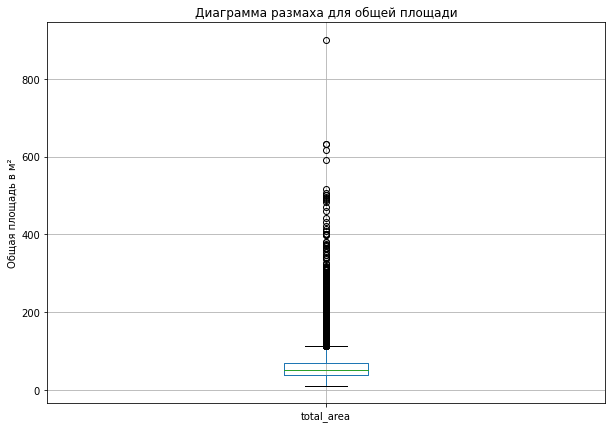

<AxesSubplot:title={'center':'Распределение предложений по размеру общей площади'}, ylabel='Frequency'>

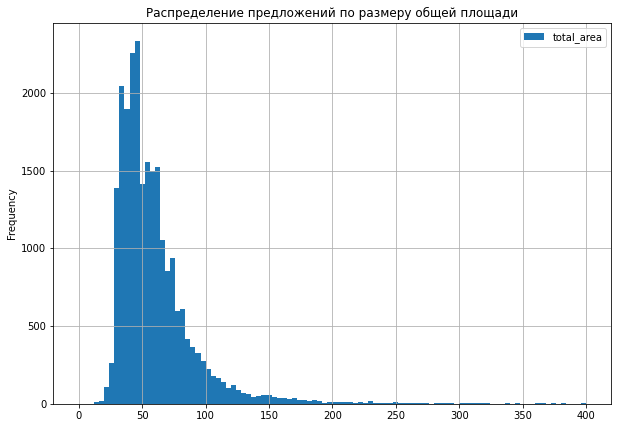

In [33]:
# Построим диаграмму размаха для общей площади
data.boxplot(column=['total_area'], figsize=(10,7), grid=True)
plt.title('Диаграмма размаха для общей площади')
plt.ylabel('Общая площадь в м²')
plt.show()

#Построим гистограмму для общей площади
data.plot(kind = 'hist', y= 'total_area', range = (0, 400), bins=100, grid = True, figsize=(10,7), title = 'Распределение предложений по размеру общей площади')

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Я бы советовал сократить range и тогда мы сможем увидеть пиковые значения. 
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Поправила </div>

По графикам видим, что основная доля квартир в выборке по общей площади варьируется в промежутке от 20 до 100 м². Для проведения дальнейшего анализа есть смысл ограничить выборку по границам основного массива.

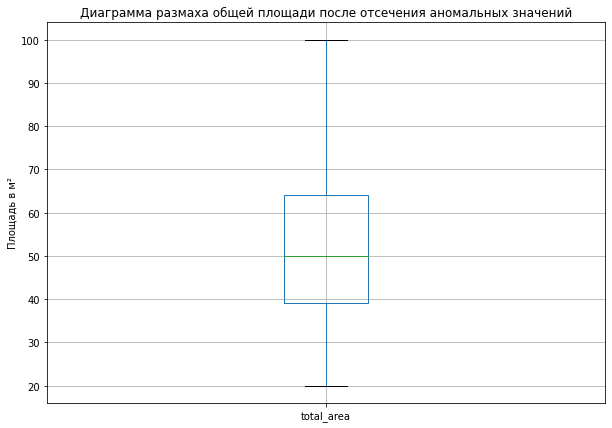

<AxesSubplot:title={'center':'Обновленное распределение предложений по размеру общей площади'}, ylabel='Frequency'>

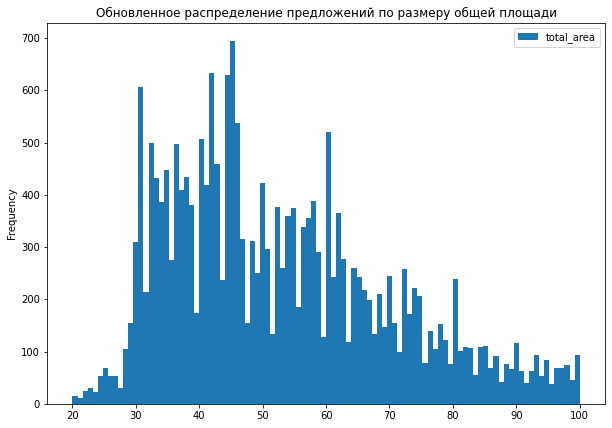

In [34]:
#Ограничиваем выборку данных по общей площади
data_query = data.query('total_area >= 20 & total_area <= 100')

#Построим диаграмму размаха для общей площади по новым данным
data_query.boxplot(column=['total_area'], figsize=(10,7), grid=True)
plt.title('Диаграмма размаха общей площади после отсечения аномальных значений')
plt.ylabel('Площадь в м²')
plt.show()

#Обновим гистограмму для общей площади
data_query.plot(kind = 'hist', y= 'total_area', bins=100, figsize=(10,7), title = 'Обновленное распределение предложений по размеру общей площади')

**ПЛОЩАДЬ КУХНИ**

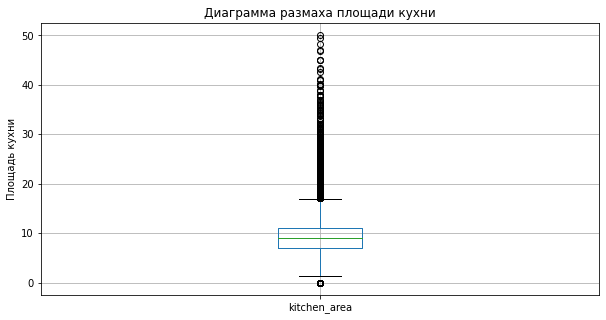

In [35]:
# Построим диаграмму размаха для площади кухни
data_query.boxplot('kitchen_area', figsize=(10,5))
plt.title('Диаграмма размаха площади кухни')
plt.ylabel('Площадь кухни')
plt.show()

На основе полученной диаграммы вижу необходимым ограничить выборку данных для площади кухни в следующих границах: 5-15 м².

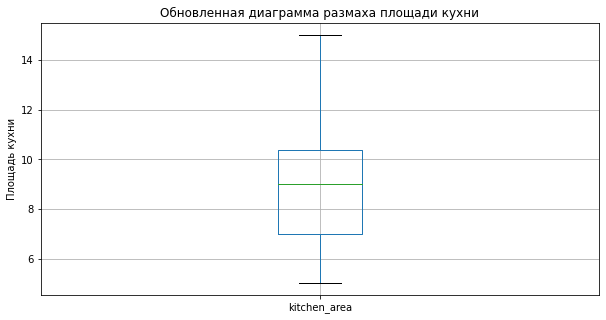

<AxesSubplot:title={'center':'Обновленное распределение предложений по размеру площади кухни'}, ylabel='Frequency'>

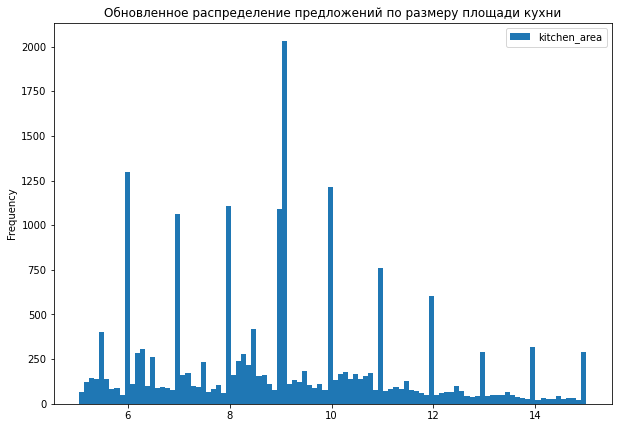

In [36]:
#Ограничиваем выборку данных для площади кухни
data_query = data_query.query('kitchen_area > 5 and kitchen_area <= 15')

#Построим диаграмму размаха для площади кухни по новым данным
data_query.boxplot('kitchen_area', figsize=(10,5))
plt.title('Обновленная диаграмма размаха площади кухни')
plt.ylabel('Площадь кухни')
plt.show()

#Строим гистограмму для площади кухни с обновленными данными
data_query.plot(kind = 'hist', y= 'kitchen_area', bins=100, figsize=(10,7), title = 'Обновленное распределение предложений по размеру площади кухни')

**ЖИЛАЯ ПЛОЩАДЬ**

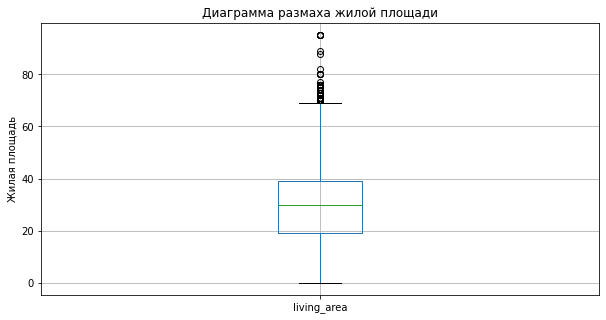

<AxesSubplot:title={'center':'Распределение предложений по размеру жилой площади'}, ylabel='Frequency'>

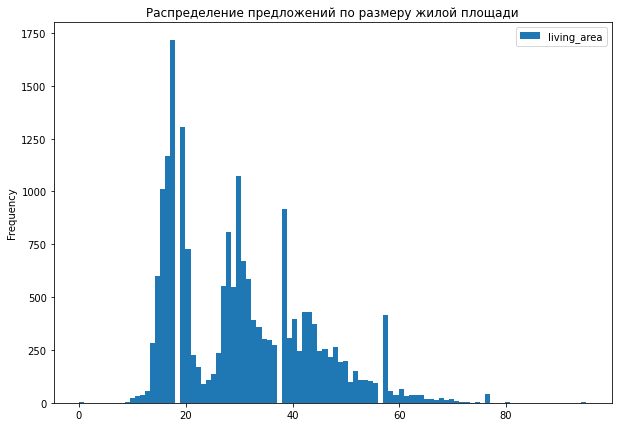

In [37]:
# Построим диаграмму размаха для жилой площади
data_query.boxplot('living_area', figsize=(10,5))
plt.title('Диаграмма размаха жилой площади')
plt.ylabel('Жилая площадь')
plt.show()

# Построим гистограмму для жилой площади
data_query.plot(kind = 'hist', y= 'living_area', bins=100, figsize=(10,7), title = 'Распределение предложений по размеру жилой площади')

**ЦЕНА**

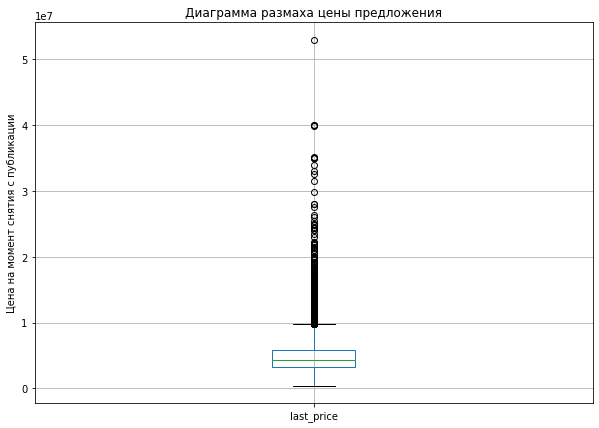

In [38]:
# Построим диаграмму размаха для цены
data_query.boxplot('last_price', figsize=(10,7))
plt.title('Диаграмма размаха цены предложения')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

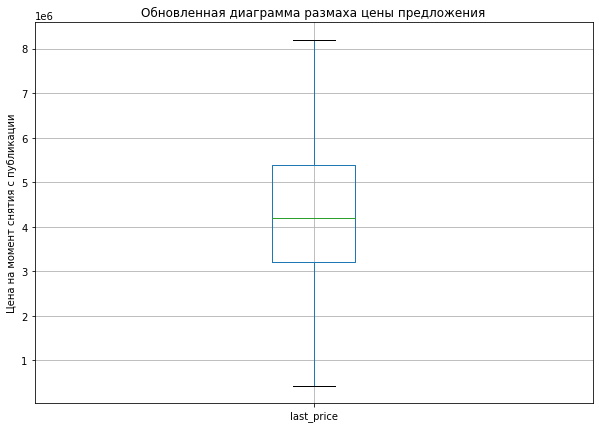

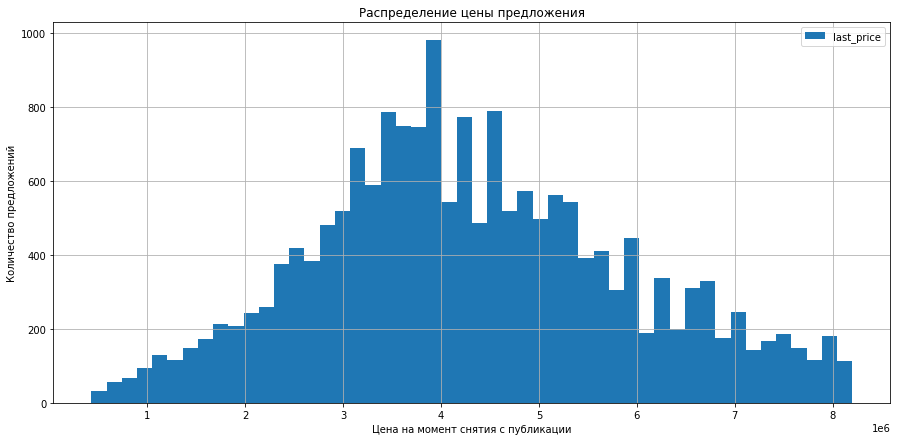

In [39]:
#Ограничим выборку данных для цены в пределах 8,2 млн. руб.
data_query = data_query.query('last_price <= 8200000')

#Построим диаграмму размаха для новых данных по цене
data_query.boxplot('last_price', figsize=(10,7))
plt.title('Обновленная диаграмма размаха цены предложения')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

#Построим обновленную гистограмму по цене
data_query.plot(kind='hist', y='last_price', title='Распределение цены предложения', grid=True, bins=50, figsize=(15,7))
plt.ylabel('Количество предложений')
plt.xlabel('Цена на момент снятия с публикации')
plt.show()

**КОЛИЧЕСТВО КОМНАТ**

,last_price,share
rooms,,
0,57,0.314396
1,7435,41.009377
2,6417,35.394374
3,3755,20.711528
4,442,2.437948
5,22,0.121346
6,2,0.011031


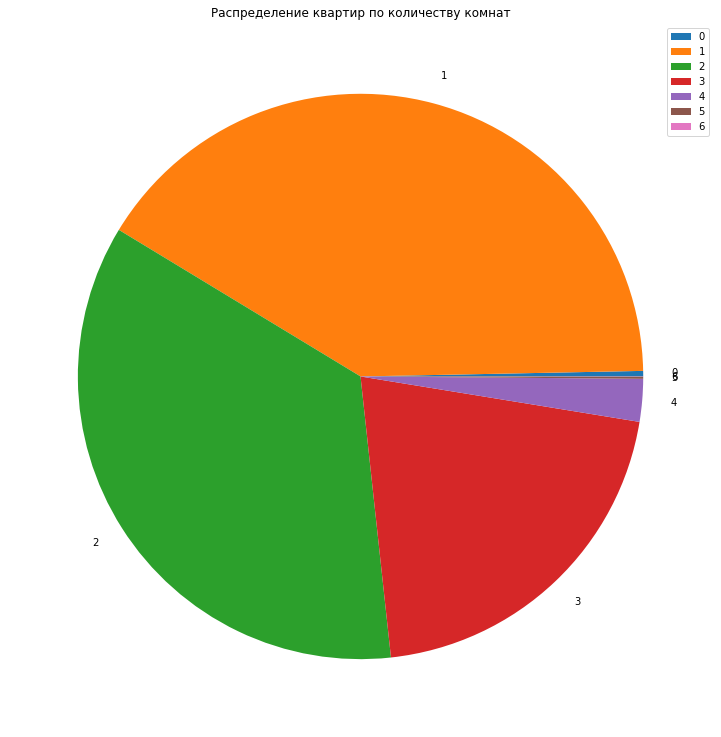

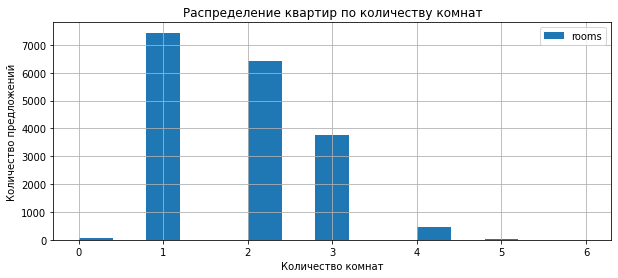

In [40]:
# Построим круговую диаграмму для визуализации распределения количества комнат.
# Для этого создадим сводную таблицу, в которой сохраним количество объявлений для каждого вида комнат
rooms_pivot = data_query.pivot_table(index='rooms', values=['last_price'], aggfunc='count')

# Добавляем столбец 'share' в 'rooms_pivot', в котором записываем долю каждого вида комнат от всех объявлений
rooms_pivot['share'] = (rooms_pivot['last_price'] / rooms_pivot['last_price'].sum()) * 100
display(rooms_pivot)

# Создаем круговую диаграмму по количеству комнат
rooms_pivot.plot(y='last_price', kind='pie', figsize=(13, 13), title='Распределение квартир по количеству комнат')
plt.ylabel('')

#Построим столбчатую гистограмму по количеству комнат
data_query.plot(kind='hist',y='rooms',title='Распределение квартир по количеству комнат',grid=True, bins=15, figsize=(10,4))
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()

**ВЫСОТА ПОТОЛКОВ**

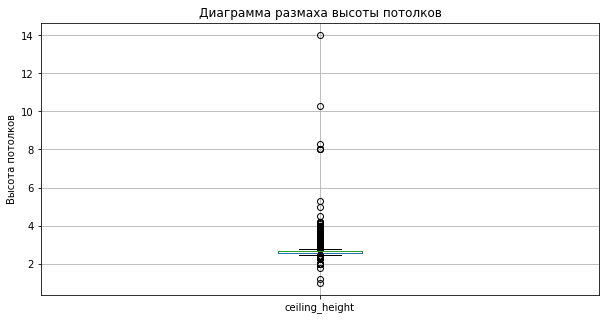

In [41]:
# Строим диаграмму размаха высоты потолков
data_query.boxplot(column=['ceiling_height'], figsize=(10,5), grid=True)
plt.title('Диаграмма размаха высоты потолков')
plt.ylabel('Высота потолков')
plt.show()

На основе полученной диаграммы размаха предлагаю ограничить выборку данных для высоты потолков в следующих границах: отсечем квартиры с потолками ниже 2.4 м и выше 2.8 м.

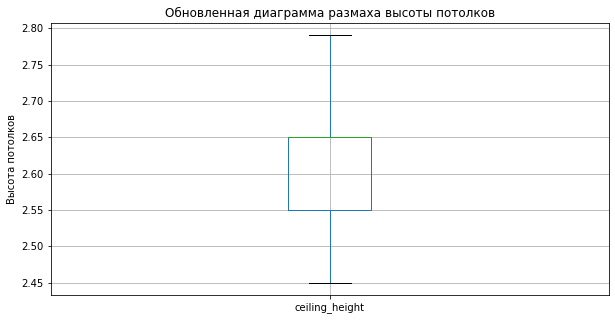

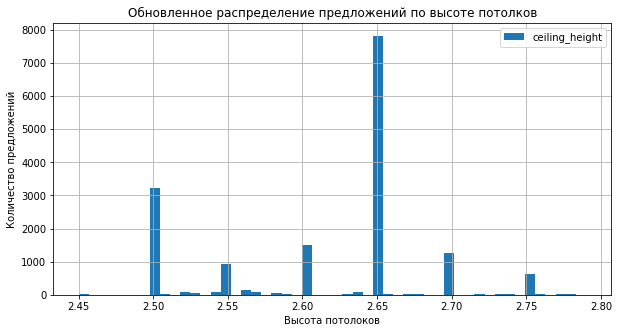

In [42]:
#Ограничим выборку данных для высоты потолков в пределах 2.4-2.8 метров
data_query = data_query.query('ceiling_height > 2.4 and ceiling_height < 2.8')

# Построим диаграмму размаха для обновленных данных по высоте потолков
data_query.boxplot(column=['ceiling_height'], figsize=(10,5), grid=True)
plt.title('Обновленная диаграмма размаха высоты потолков')
plt.ylabel('Высота потолков')
plt.show()

#Строим гистограмму для обновленных данных по высоте потолков
data_query.plot(kind='hist',y='ceiling_height',grid=True, bins=50, figsize=(10,5), title='Обновленное распределение предложений по высоте потолков')
plt.xlabel('Высота потолоков')
plt.ylabel('Количество предложений')
plt.show()

**Промежуточный вывод:**

1. **Распределение по площади**: бОльшая часть квартир на рынке имеет общий метраж от 30 до 80 м², пик предложений приходится на 45 м², причем основная часть предложений по размеру жилой площади - 18 м², площади кухни - 9 м².
2. **Распределение цены предложения**: цена на квартиры лежит в промежутке от 2 до 7 млн. Большая часть квартир продается за цену в диапазоне 3-5 млн. руб. Наиболее часто встречаемая цена за квартиру - 3,9 млн.руб.
3. **Распределение по количеству комнат**: 2/3 квартир относятся к квартирам с 1-2 комнатами. Трехкомнатные квартиры занимают 23% рынка объявлений. Квартиры-студии, а также квартиры с 4 комнатами и более имеют незначительный вес в массиве данных.
4. **Распределение по высоте потолков**: основная часть квартир имеют высоту потолков в промежутке 2,5-2,65 м (самый популярный вариант).

Теперь обратимся к параметрам этажности и расстояния - до центра города, до ближайшего парка.

**ТИП ЭТАЖА КВАРТИРЫ**

In [43]:
#Посмотрим на основные характеристики этажности - этаж квартиры и общее количество этажей в доме.
display(data[['floor', 'floors_total']].describe())

,floor,floors_total
count,23650.000000,23650.000000
mean,5.893277,10.684059
std,4.883317,6.597081
min,1.000000,1.000000
25%,2.000000,5.000000
50%,4.000000,9.000000
75%,8.000000,16.000000
max,33.000000,60.000000


Видим, что среднестатистическая (медианная) квартира, встречаемая в объявлениях, находится на 4 этаже в 9-этажном доме.

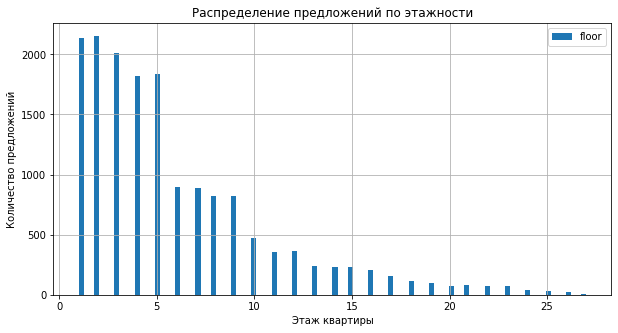

In [44]:
# Построим гистограмму распределения предложений этажности:
data_query.plot(kind='hist',y='floor',grid=True, bins=100, figsize=(10,5), title='Распределение предложений по этажности')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество предложений')
plt.show()

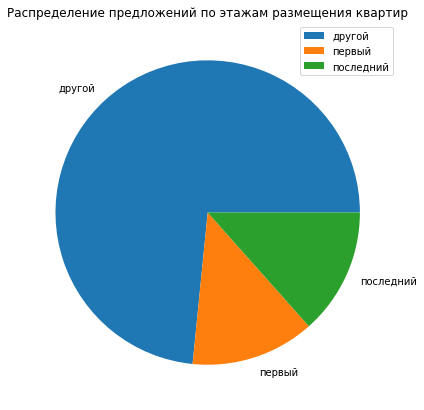

In [45]:
#Построим круговую диаграмму распределения предложений по этажам размещения квартир
data_query.pivot_table(index='floor_category',values='last_price',aggfunc='count') \
  .plot(kind = 'pie', y='last_price', figsize=(10,7), label = '', title='Распределение предложений по этажам размещения квартир')
plt.show()

**Общее количество этажей в доме**

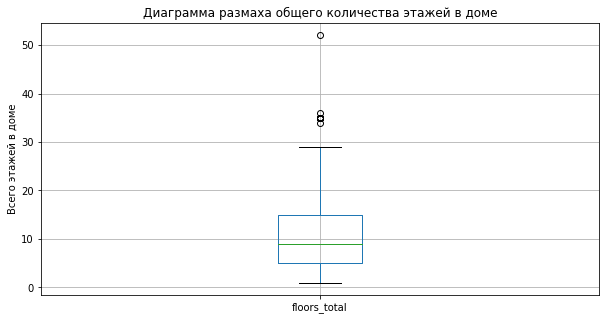

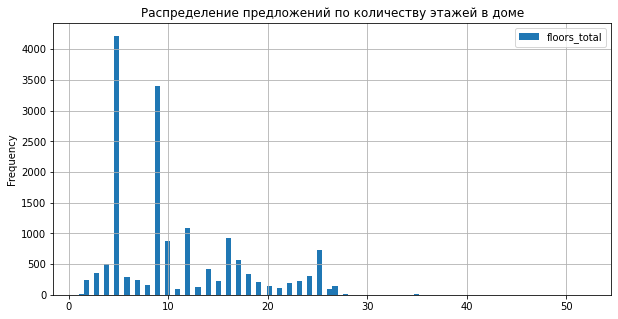

In [46]:
# Построим диаграмму размаха по общему количеству этажей в доме
data_query.boxplot(column=['floors_total'], grid=True, figsize=(10,5))
plt.title('Диаграмма размаха общего количества этажей в доме')
plt.ylabel('Всего этажей в доме')
plt.show()

#Гистограмма общего количества этажей в доме
data_query.plot(kind = 'hist', y='floors_total',grid=True, bins=100, figsize=(10,5), title='Распределение предложений по количеству этажей в доме')
plt.show()

**Промежуточный вывод по этажности:**

3/4 продаваемых квартир располагаются на этажах в диапазоне от 2-го до предпоследнего включительно. Квартиры на первом и последнем этажах имеют примерно равную долю и пользуются меньшим спросом на рынке недвижимости.

**Расстояние до центра города в метрах**

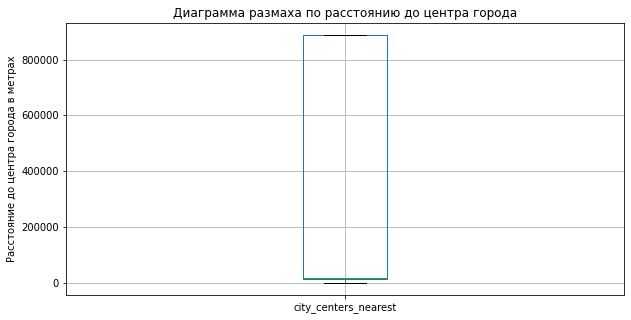

In [47]:
# Построим диаграмму размаха по расстоянию до центра города
data_query.boxplot(column='city_centers_nearest', grid=True, figsize=(10,5))
plt.title('Диаграмма размаха по расстоянию до центра города')
plt.ylabel('Расстояние до центра города в метрах')
plt.show()

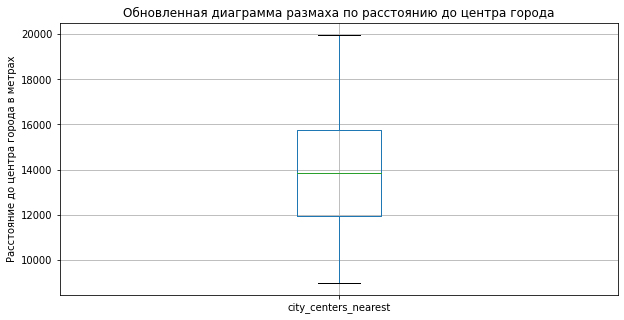

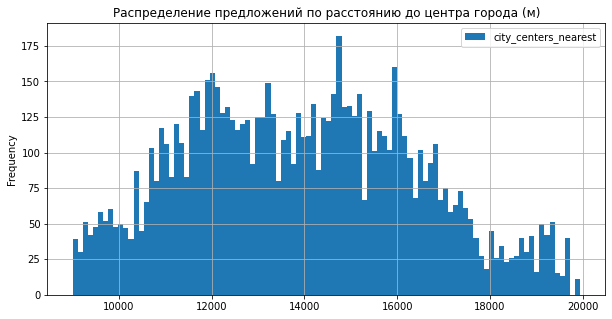

In [48]:
#Ограничим выборку для расстояния до центра города диапазоном 20000 метров
data_query = data_query.query('city_centers_nearest > 9000 and city_centers_nearest < 20000')

# Построим диаграмму размаха для обновленных данных расстояния до центра города
data_query.boxplot(column=['city_centers_nearest'], grid=True, figsize=(10,5))
plt.title('Обновленная диаграмма размаха по расстоянию до центра города')
plt.ylabel('Расстояние до центра города в метрах')
plt.show()

# Строим гистограмму по расстоянию до центра города в метрах
data_query.plot(kind = 'hist', y='city_centers_nearest',grid=True, bins=100, figsize=(10,5), title='Распределение предложений по расстоянию до центра города (м)')
plt.show()

**Расстояние до ближайшего парка**

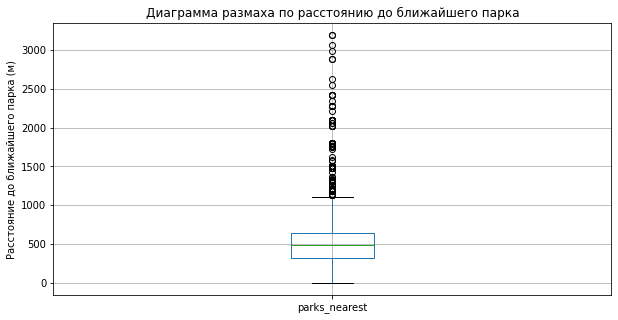

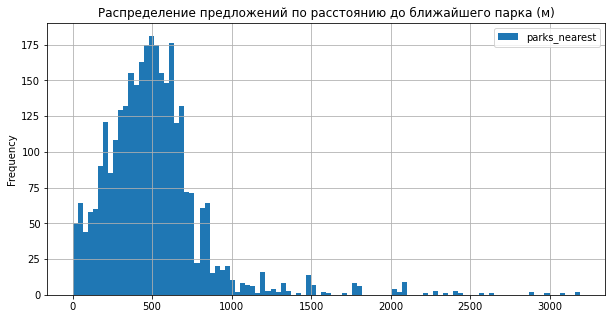

In [49]:
# Построим диаграмму размаха по расстоянию до ближайшего парка
data_query.boxplot(column='parks_nearest', grid=True, figsize=(10,5))
plt.title('Диаграмма размаха по расстоянию до ближайшего парка')
plt.ylabel('Расстояние до ближайшего парка (м)')
plt.show()

# Строим гистограмму по расстоянию до центра города в метрах
data_query.plot(kind = 'hist', y='parks_nearest',grid=True, bins=100, figsize=(10,5), title='Распределение предложений по расстоянию до ближайшего парка (м)')
plt.show()

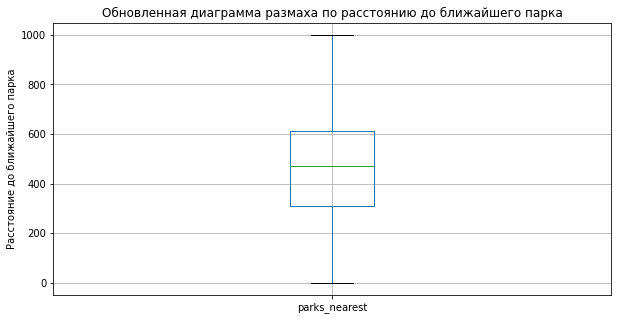

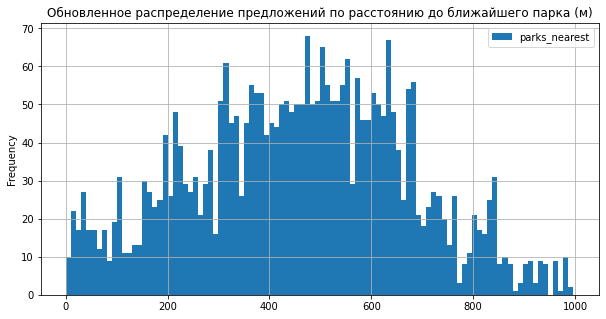

In [50]:
#Ограничим выборку для расстояния до ближайшего парка диапазоном 0-1100 метров
data_query = data_query.query('parks_nearest >= 0 and parks_nearest < 1000')

# Построим диаграмму размаха для обновленных данных расстояния до центра города
data_query.boxplot(column=['parks_nearest'], grid=True, figsize=(10,5))
plt.title('Обновленная диаграмма размаха по расстоянию до ближайшего парка')
plt.ylabel('Расстояние до ближайшего парка')
plt.show()

# Строим гистограмму по расстоянию до центра города в метрах
data_query.plot(kind = 'hist', y='parks_nearest',grid=True, bins=100, figsize=(10,5), title='Обновленное распределение предложений по расстоянию до ближайшего парка (м)')
plt.show()

**Промежуточный вывод по расстоянию до центра города и ближайшего парка:**

В большинстве случаев парки располагаются в пешей доступности (500 м), а расстояние до центра города - в пределах 11 км.

**СРОКИ ПРОДАЖИ КВАРТИРЫ**

Изучим, как быстро продавались квартиры - сколько дней было размещено каждое объявление.

In [51]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим, что по медианному значению квартиры снимаются с продажи в течение 95 дней, а по среднему - за 180 дней.

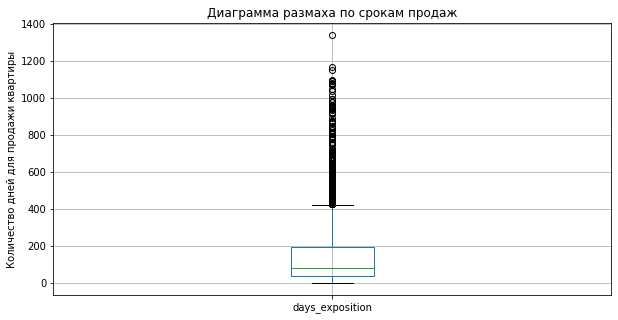

In [52]:
# Проверим выборку данных по срокам продаж

data_query.boxplot('days_exposition', figsize=(10,5))
plt.title('Диаграмма размаха по срокам продаж')
plt.ylabel('Количество дней для продажи квартиры')
plt.show()

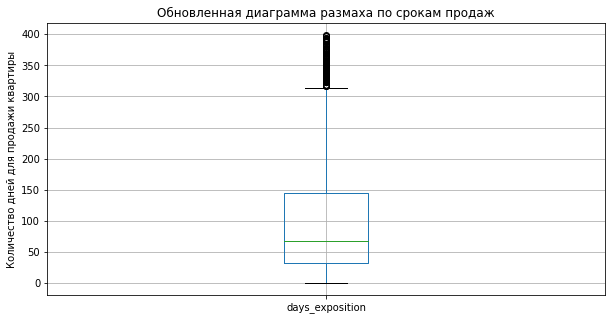

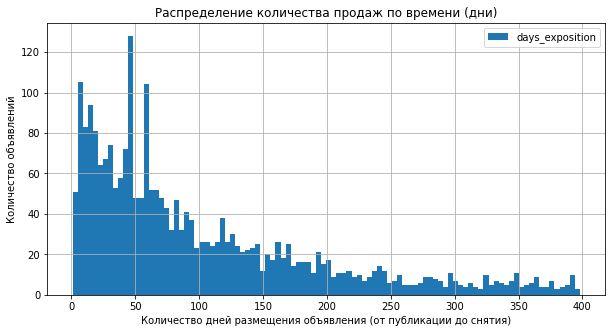

In [53]:
#Ограничим выборку по срокам продаж диапазоном 0-400 дней
data_query = data_query.query('days_exposition >0 and days_exposition < 400')

# Построим диаграмму размаха для обновленных данных расстояния до центра города
data_query.boxplot(column=['days_exposition'], grid=True, figsize=(10,5))
plt.title('Обновленная диаграмма размаха по срокам продаж')
plt.ylabel('Количество дней для продажи квартиры')
plt.show()

# Строим гистограмму по расстоянию до центра города в метрах
data_query.plot(kind = 'hist', y='days_exposition', grid=True, bins=100, figsize=(10,5), title='Распределение количества продаж по времени (дни)')
plt.xlabel('Количество дней размещения объявления (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

**Вывод по срокам продаж:**

Из графика видим, что в среднем продажа квартиры занимает 1-3 месяца. Количество объявлений сокращается с увеличением срока размещения объявления - на длительный срок (от 231 дней) в продаже зависают квартиры, недостаточно привлекательные для потенциальных клиентов по тем или иным сопутствующим факторам: площадь квартиры, цена, удалённость от центра и т.д. К быстрым продажам можем отнести квартиры, которые были проданы в срок до 45 дней.

**ФАКТОРЫ, НАИБОЛЕЕ ВЛИЯЮЩИЕ НА ПОЛНУЮ СТОИМОСТЬ ОБЪЕКТА**

Изучим зависимость цены от площади, количества комнат, этажа, на котором расположена квартира, даты размещения. Для определения зависимости между данными параметрами построим диаграмму рассеяния для визуальной оценки взаимосвязи параметров, после чего рассчитаем коэффициент корреляции Пирсона.

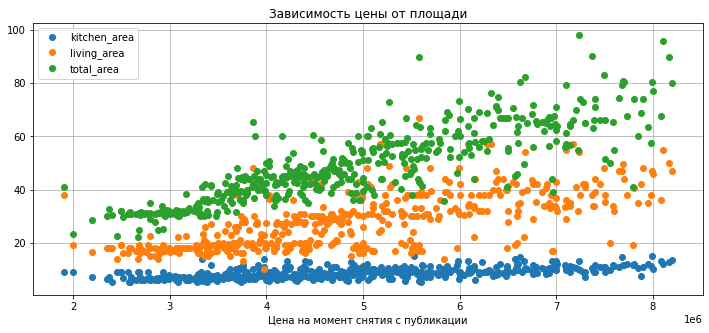

In [54]:
# Создаем сводные таблицы по зависимости цены от площади (жилая, общая, кухня)
data_query_grouped = data_query.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area'], aggfunc = 'median')
# Для наглядности распределения значений построим cкаттерплот
data_query_grouped.plot(style='o',grid=True, figsize=(12, 5), title='Зависимость цены от площади')
plt.xlabel('Цена на момент снятия с публикации')
plt.show()

Для определения зависимости между такими параметрами, как **цена и дата публикации объявления (день, месяц, год)** воспользуемся методом .plot() и построим столбчатую гистограмму для визуальной оценки взаимосвязи параметров, сравнивая день, месяц, год и среднюю стоимость квартиры в этот момент.

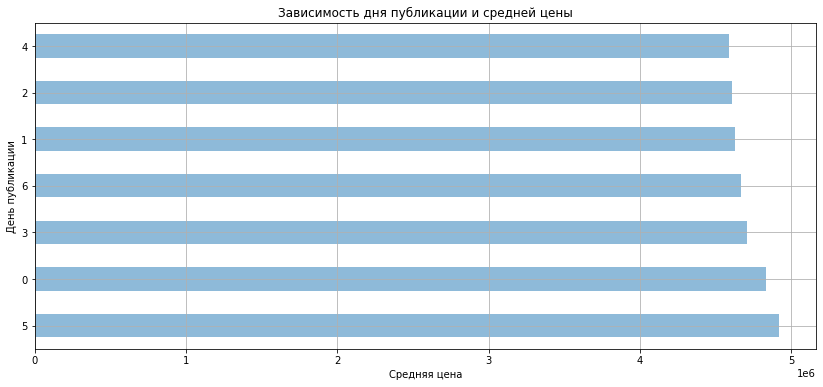

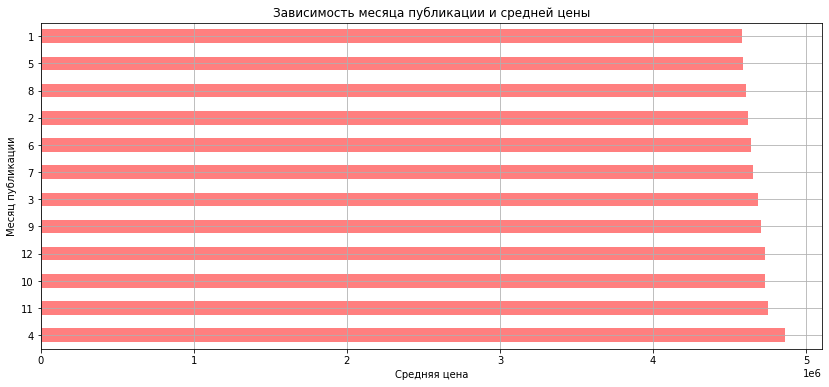

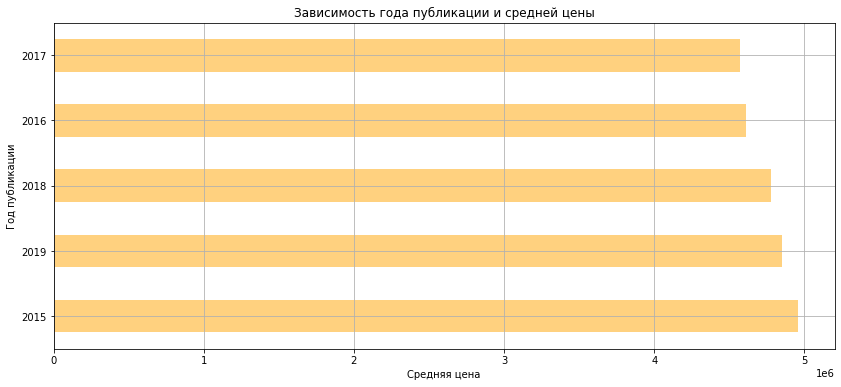

In [55]:
# Строим диаграмму зависимости 'дня публикации и средней цены'
(
    data_query
    .pivot_table(index = 'weekday', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', title='Зависимость дня публикации и средней цены', figsize=(14, 6), legend=False, alpha=0.5, grid=True, ylim=(4300, 4800))
)
plt.xlabel('Средняя цена')
plt.ylabel('День публикации')
plt.show()

# Строим график зависимости 'месяца публикации и средней цены'
(
    data_query
    .pivot_table(index = 'month', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', title='Зависимость месяца публикации и средней цены', color='red', figsize=(14, 6), legend=False, alpha=0.5, grid=True, ylim=(4300, 4800))
)
plt.xlabel('Средняя цена')
plt.ylabel('Месяц публикации')
plt.show()
    
# Строим график зависимости 'года публикации и средней цены'
(
    data_query
    .pivot_table(index = 'year', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', title='Зависимость года публикации и средней цены', color='orange', figsize=(14, 6), legend=False, alpha=0.5, grid=True, ylim=(4300, 4800))
)
plt.xlabel('Средняя цена')
plt.ylabel('Год публикации')
plt.show()

Для определения зависимости между такими параметрами, как **цена и тип этажа**, построим столбчатую гистограмму для визуальной оценки взаимосвязи параметров, сравнивая тип этажа и среднюю стоимость квартиры.

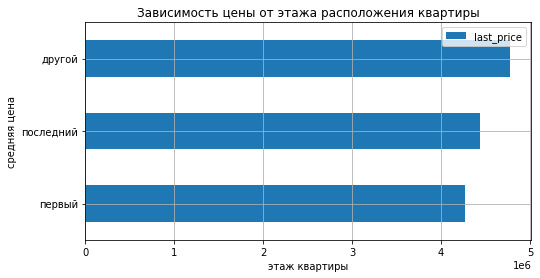

In [56]:
#Построим гистограмму по зависимости цены от этажа расположения квартиры
data_query.pivot_table(index='floor_category', values='last_price').sort_values(by='last_price', ascending=True) \
  .plot(kind = 'barh', grid=True, figsize=(8, 4), title='Зависимость цены от этажа расположения квартиры')

plt.xlabel('этаж квартиры')
plt.ylabel('средняя цена')
plt.show()

Для определения зависимости между такими параметрами, как **цена и количество комнат**, построим столбчатую гистограмму для визуальной оценки взаимосвязи параметров, сравнивая количество комнат и среднюю цену квартиры.

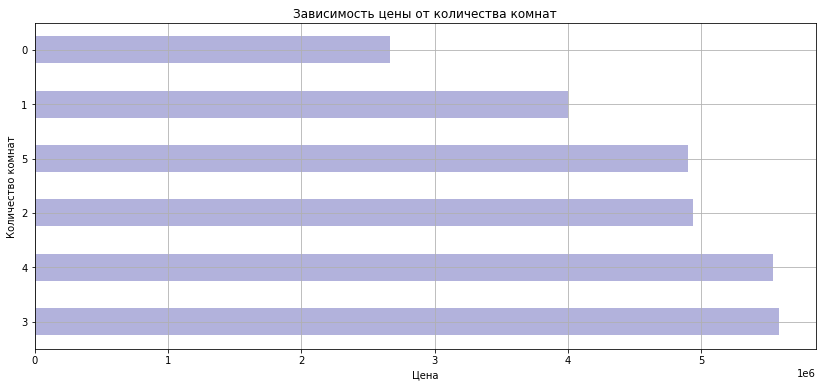

In [57]:
# Строим график зависимости средней цены и количества комнат
(
    data_query
    .pivot_table(index = 'rooms', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', color='darkblue', title='Зависимость цены от количества комнат', figsize=(14, 6), legend=False, alpha=0.3, grid=True, ylim=(2000, 8000))
)
plt.xlabel('Цена')
plt.ylabel('Количество комнат')
plt.show()

In [58]:
#Рассчитаем коэффициент корреляции Пирсона для поиска взаимосвязи цены и остальных параметров

сorr_query = data_query.corr()
display(сorr_query.sort_values(by='last_price', ascending=False)['last_price'].reset_index().head(25))

,index,last_price
0,last_price,1.000000
1,total_area,0.766792
2,living_area,0.581711
3,rooms,0.497678
4,kitchen_area,0.446655
5,floors_total,0.349934
6,price_per_square_meter,0.298796
7,floor,0.219488
8,balcony,0.187839
9,ceiling_height,0.183487


**Вывод о зависимости цены от площади, количества комнат, удалённости от центра, этажа, даты публикации:**
1. **Анализ зависимости между ценой и датой публикации**:
- *День публикации*: максимальная цена фиксируется в такие дни, как суббота и понедельник. Данную закономерность можно объяснить следующим образом: если человек занимается продажей квартиры самостоятельно, то в выходные дни у него появляется свободное время для оформления профиля объекта недвижимости и дополнительная возможность для публикации объявления на сервисы по продаже недвижимости. С другой стороны, именно в понедельник (первый рабочий день по графику 5/2) в работу включаются риэлторские агентства, к которым обращаются заинтересованные категории собственников - кто не готов заниматься продажей своего имущества самостоятельно. Поэтому в указанные дни объявление выставляется с учетом максимальной желаемой цены для продажи.
- *Месяц публикации*: наиболее высокая цена отмечена в апреле, а самая низкая - в январе. Мысли по данному поводу: весной увеличивается число потенциальных клиентов, готовых совершить дорогостоящую покупку (праздники уже закончились, траты сократились, появились сбережения) с перспективой побыстрее начать ремонт - летний благоприятный период. При этом в январе частные лица больше стремятся экономить после праздников, а организации готовятся к уплате ежегодных налогов и ожидают утверждения бюджета организации на очередной финансовый год - соответственно, временно не заинтересованы в покупке объектов недвижимости.
- *Год публикации*: в 2015 году средняя цена составила примерно 4.9 млн. руб., что является самым высоким показателем по имеющейся выборке данных. На втором месте - значения 2019 года. В 2015 и 2019 гг. фиксировались низкие процентные ставки по ипотеке, что, в свою очередь, вызывало повышенный спрос на недвижимость. В целом цена предложения на квартиры в разные годы отличается по причине изменения ситуации на рынке недвижимости и монетарной политики Центрального банка по ипотечным кредитам.
2. **Анализ зависимости между ценой и этажом размещения квартиры**: самая высокая цена у квартир, которые расположены выше 1-го и ниже последнего этажа. Наиболее дешевые квартиры находятся на 1-м этаже.
3. **Анализ зависимости между ценой и площадью**: коэффициент корреляции Пирсона между ценой и общей площадью составляет 0.77, между ценой и жилой площадью - 0.58, между ценой и площадью кухни - 0.45. Данные значения говорят о сильной положительной корреляции, то есть прямой зависимости между ценой и площадью объекта недвижимости. Кроме того, важно отметить, что площадь является главным параметром, влияющим на ценообразование на рынке недвижимости. Анализируя диаграмму рассеяния важно отметить, что наибольшая концентрация объявлений находится в ячейке с параметрами: цена - 3.5-6 млн. руб. и общая площадь - 40-60 м².
4.  **Анализ зависимости между ценой и расстоянием до центра города**: В данном случае коэффициент корреляции Пирсона имеет околонулевое отрицательное значение (-0.08), что говорит о том, что между ценой и расстоянием до центра зависимость является достаточно слабой, но обратно пропорциональной - чем дальше от центра, тем ниже цена. Анализируя диаграмму рассеяния можно подчеркнуть, что наибольшая концентрация объявлений находится в следующем диапазоне: цена - 3-6 млн. рублей и расстояние от центра - 10-20 км. В зоне менее 10 км имеются как дешёвые так и дорогие квартиры, поэтому зависимость данных параметров практически отсутствует.
5. **Анализ зависимости между ценой и количеством комнат**: цена квартиры также напрямую зависит от числа комнат (коэффициент корреляции равен 0.5): чем больше комнат, тем квартира дороже. Но это правило соблюдается, пока число комнат не превышает 4-х - 5-комнатные квартиры могут быть проданы дешевле 4-комнатных, и вызвано это, скорее всего, отсутствием спроса.

Таким образом следует выделить наиболее значимые факторы, которые оказывают влияние на цену предложения: площадь квартиры, этаж и количество комнат. Дата публикации и удаленность объекта от центра не имеют ключевого значения в ценообразовании на рынке недвижимости.

**РАСЧЁТ СРЕДНЕЙ ЦЕНЫ ОДНОГО КВАДРАТНОГО МЕТРА В 10 НАСЕЛЁННЫХ ПУНКТАХ С НАИБОЛЬШИМ ЧИСЛОМ ОБЪЯВЛЕНИЙ**

Изучим следующие параметры:
- населённые пункты с наибольшим числом объявлений;
- средняя цена квадратного метра в этих населённых пунктах;
- населённые пункты с самой высокой и низкой стоимостью жилья за м²

,count,median
locality_name,,
санкт-петербург,15721,104761.900
посёлок мурино,556,85878.465
посёлок шушары,440,76876.175
всеволожск,398,65789.470
пушкин,369,100000.000
колпино,338,74723.745
посёлок парголово,327,91642.860
гатчина,307,67796.610
деревня кудрово,299,91860.470


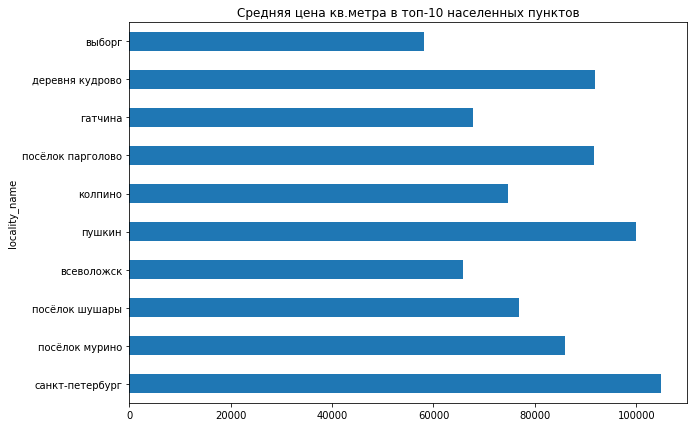

In [59]:
# Формируем топ-10 населенных пунктов по количеству объявлений и считаем среднюю цену кв. метра
median_price_per_sqm = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'median'])
median_price_per_sqm.columns = ['count', 'median']
median_price_per_sqm = median_price_per_sqm.sort_values(by = 'count', ascending=False).head(10)
display(median_price_per_sqm)

#Построим круговую диаграмму по средней цене кв. метра
median_price_per_sqm.plot(kind = 'barh', y='median', figsize=(10,7), legend = False, label = '', title='Средняя цена кв.метра в топ-10 населенных пунктов')
plt.show()

**Вывод о средней цене квадратного метра в 10 населенных пунктах с наибольшим числом объявлений:**
1. В топе населенных пунктов по уровню средней цены квадратного метра: Санкт-Петербург, Пушкин, деревня (уже город) Кудрово и посёлок Парголово. Наименее дорогие квартиры за квадратный метр ноходятся в Выборге и Всеволожске.
2. **Наиболее высокая цена** за квадратный метр фиксируется в Санкт-Петербурге - 104,76 тыс. руб. **Самая низкая цена** отмечена в Выборге - 58,16 тыс. руб. Таким образом размах между максимальной и минимальной ценами квадратного метра составляет почти 2 раза.

**ЗАВИСИМОСТЬ СТОИМОСТИ ОБЪЕКТА ОТ РАССТОЯНИЯ ДО ЦЕНТРА ГОРОДА**

Для определения зависимости стоимости объектов недвижимости от расстояния до центра Санкт-Петербурга выполним следующие шаги:
- ограничим выборку данных квартирами в Санкт-Петербурге;
- вычислим их среднюю стоимость с учетом каждого километра расстояния до центра;
- построим график изменения средней цены для каждого километра от центра.

count    15721.000000
mean        14.988868
std         54.579678
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max        886.000000
Name: distance_city_centers_km, dtype: float64


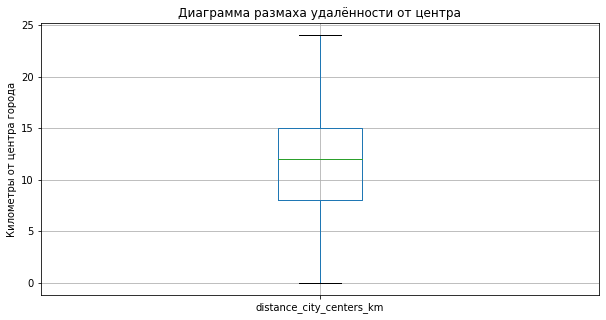

In [60]:
# Ограничим выборку квартир границами Санкт-Петерурга
spb = data.loc[data['locality_name'] == 'санкт-петербург']

# Обратимся к характеристикам параметра "Расстояние до центра города в километрах"
print(spb['distance_city_centers_km'].describe())

#Построим диаграмму размаха с ограничением выборки в 25 км до центра города:
spb = spb.query('distance_city_centers_km >= 0 and distance_city_centers_km < 25')
spb.boxplot(column=['distance_city_centers_km'], grid=True, figsize=(10,5))
plt.title('Диаграмма размаха удалённости от центра')
plt.ylabel('Километры от центра города')
plt.show()

In [61]:
mean_price_per_km = spb['last_price'].sum()/spb['distance_city_centers_km'].sum()
print(f'Средняя цена для каждого км расстояния до центра составляет {mean_price_per_km:.0f} руб.')

Средняя цена для каждого км расстояния до центра составляет 700005 руб.


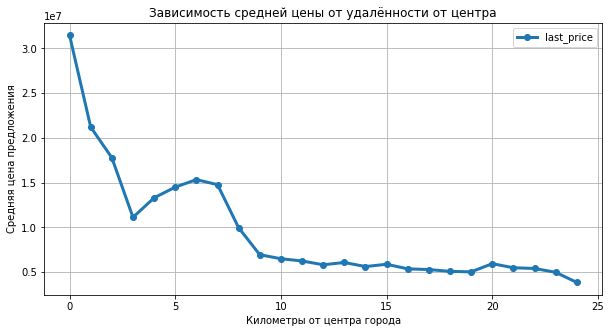

In [62]:
# Построим график изменения средней цены для каждого километра от центра
spb.pivot_table(index='distance_city_centers_km', values='last_price', aggfunc='mean') \
   .plot(style = 'o-', figsize=(10,5), grid=True, linewidth=3, title='Зависимость средней цены от удалённости от центра')
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя цена предложения')
plt.show()

**Вывод о зависимости стоимости объекта от расстояния до центра города**

На графике можем наблюдать 3 ключевых интервала изменения цены в зависимости от удаленности от центра:
- 0-3 км;
- 3-6 км;
- 7 км и более. 

В границах 0-3 км идет резкий спад цены в расчете на каждый км расстояния. С 3 по 6 км отмечаем рост - вероятно, в этот радиус попадают квартиры Московского и Петроградского районов, где к продаже предлагаются элитные новостройки. На расстоянии 7 км от центра - окончательный виток спада с постепелнным замедлением динамики ценовых колебаний.

### Общий вывод исследования

В процессе исследования были проанализированы объявления о продаже квартир в Санкт-Петербурге и его пригородах на основе данных сервиса Яндекс.Недвижимость. 
Итоги предобработки данных выявили необходимость повышения качества данных, предоставляемых для анализа: в массиве данных отмечены пропуски по 14 из 22 колонок.
По результатам можно выделить наиболее значимые параметры, которые влияют на ценообразование на рынке недвижимости:

1. **Количество комнат** - чем больше комнат, тем выше стоимость жилья.
2. **Общая площадь квартиры** - чем больше площадь, тем выше стоимость жилья.
3. **Этаж квартиры** - на первом этаже самые дешевые квартиры, наиболее дорогие квартиры располагаются выше первого и ниже последнего этажа.

В большинстве из случаев в Санкт-Петербурге продаются 1-2-комнатные квартиры площадью 52 м² с высотой потолков 2,65 м, в здании не выше 9 этажей, реализованные в срок до 3 месяцев по цене 4,7 млн рублей со средней стоимостью 105 тыс. руб. за кв. метр.